Признаки:
1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

Задание

1.  **Загрузите файл HR.csv в pandas dataframe**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/HR.csv')
data.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


пропусков нет

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
[print(f'столбец {st}: \n {data[st].unique()} \n') for st in data.columns]
data.columns

столбец satisfaction_level: 
 [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95] 

столбец last_evaluation: 
 [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42] 

столбец number_project: 
 [2 5 7 6 4 3] 

столбец average_montly_hours: 
 [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 25

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

2. **Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).** 

In [ ]:
#Мин, макс, размах, среднее, считаем только для количественных показателей: satisfaction_level, last_evaluation, average_montly_hours
for col in ['satisfaction_level', 'last_evaluation', 'average_montly_hours']:
  data[col].max()
  data[col].min()
  #размах
  range = data[col].max()-data[col].min()
  print(f'Размах по столбцу {col}: {range.round(5)}')
  #среднеарифместическое
  sr = data[col].sum() / len(data[col])
  print(f'Среднеарифметическое по столбцу {col}: {sr.round()}')
  #мода
  print('Значение моды: ', data[col].mode()[0])
  #медиана
  print('Значение медианы: ', data[col].median())
  #СКО
  print('Значение СКО: ', data[col].std().round(5))
  #Дисперсия
  print('Значение дисперсии: ', data[col].var().round(5))
  print()

Размах по столбцу satisfaction_level: 0.91
Среднеарифметическое по столбцу satisfaction_level: 1.0
Значение моды:  0.1
Значение медианы:  0.64
Значение СКО:  0.24863
Значение дисперсии:  0.06182

Размах по столбцу last_evaluation: 0.64
Среднеарифметическое по столбцу last_evaluation: 1.0
Значение моды:  0.55
Значение медианы:  0.72
Значение СКО:  0.17117
Значение дисперсии:  0.0293

Размах по столбцу average_montly_hours: 214
Среднеарифметическое по столбцу average_montly_hours: 201.0
Значение моды:  135
Значение медианы:  200.0
Значение СКО:  49.9431
Значение дисперсии:  2494.31317



Text(0.5, 1.0, 'Распределение уровня удовлетворенности работников')

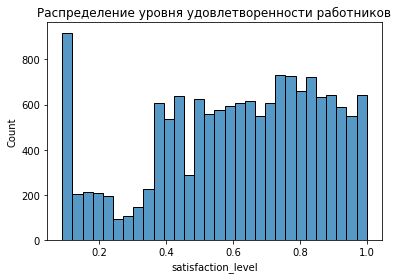

In [ ]:
#Хочется визуально посмотреть распределение величин
sns.histplot(data['satisfaction_level'])
plt.title('Распределение уровня удовлетворенности работников')

Text(0.5, 1.0, 'Время с последней оценки в годах')

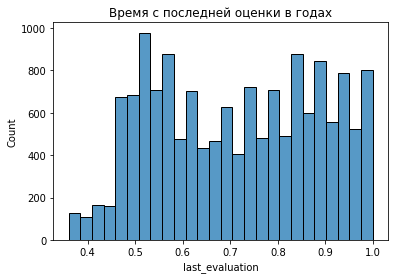

In [ ]:
sns.histplot(data['last_evaluation'])
plt.title('Время с последней оценки в годах')

Text(0.5, 1.0, 'Среднее количество часов на рабочем месте в месяц')

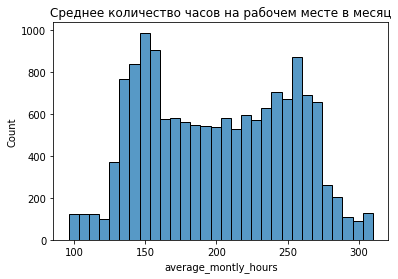

In [ ]:
sns.histplot(data['average_montly_hours'])
plt.title('Среднее количество часов на рабочем месте в месяц')

In [ ]:
#Мин, макс, размах, среднее, посчитаем для показателей целочисленных: number_project, time_spend_company
for col in ['number_project', 'time_spend_company']:
  data[col].max()
  data[col].min()
  #размах
  range = data[col].max()-data[col].min()
  print(f'Размах по столбцу {col}: {range.round(5)}')
  #среднеарифместическое
  sr = data[col].sum() / len(data[col])
  print(f'Среднеарифметическое по столбцу {col}: {sr.round()}')
  #мода
  print('Значение моды: ', data[col].mode()[0])
  #медиана
  print('Значение медианы: ', data[col].median())
  #СКО
  print('Значение СКО: ', data[col].std().round(5))
  #Дисперсия
  print('Значение дисперсии: ', data[col].var().round(5))
  print()

Размах по столбцу number_project: 5
Среднеарифметическое по столбцу number_project: 4.0
Значение моды:  4
Значение медианы:  4.0
Значение СКО:  1.23259
Значение дисперсии:  1.51928

Размах по столбцу time_spend_company: 8
Среднеарифметическое по столбцу time_spend_company: 3.0
Значение моды:  3
Значение медианы:  3.0
Значение СКО:  1.46014
Значение дисперсии:  2.132



Text(0.5, 1.0, 'Распределение по кол-ву выполненных проектов')

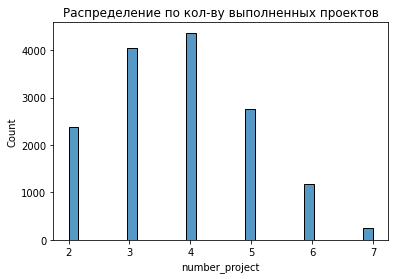

In [ ]:
# как будто бы нормальные распределения
sns.histplot(data['number_project'])
plt.title('Распределение по кол-ву выполненных проектов')

Text(0.5, 1.0, 'Распределение по кол-ву лет работы в компании')

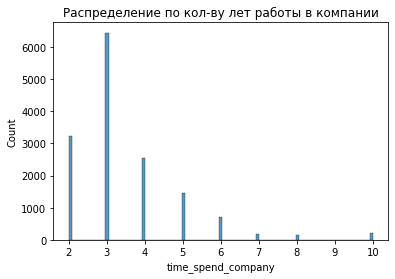

In [ ]:
sns.histplot(data['time_spend_company'])
plt.title('Распределение по кол-ву лет работы в компании')

Распределения не нормальные. Нецелочисленные показатели распределены более менее однородно?
В столбцах 'satisfaction_level', 'last_evaluation', 'average_montly_hours' как будто бы есть выбросы. Проверим?

In [ ]:
for col in ['satisfaction_level', 'last_evaluation', 'average_montly_hours']:
  # первый и третий квартили
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  print(f'Первый квартиль {col}: {Q1}')
  print(f'Третий квартиль {col}: {Q3}')
  print(f'Межквартильный размах {col}: {(Q3 - Q1).round(5)}')
  print()

Первый квартиль satisfaction_level: 0.44
Третий квартиль satisfaction_level: 0.82
Межквартильный размах satisfaction_level: 0.38

Первый квартиль last_evaluation: 0.56
Третий квартиль last_evaluation: 0.87
Межквартильный размах last_evaluation: 0.31

Первый квартиль average_montly_hours: 156.0
Третий квартиль average_montly_hours: 245.0
Межквартильный размах average_montly_hours: 89.0



In [ ]:
#func для определения границ выброса для данного параметра
def outl(data, col):
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr) 
  upper_bound = q3 + (1.5 * iqr)
  return lower_bound, upper_bound

In [ ]:
# проверка на выбросы по численным столбцам показала, что их нет. не знаю, оставить ли код себе для примера?
#data[~data['satisfaction_level'].between(outl(data, 'satisfaction_level')[0], outl(data, 'satisfaction_level')[1], inclusive=True)]['satisfaction_level'].value_counts()
#похоже в этом столбце нет выбросов

<Axes: >

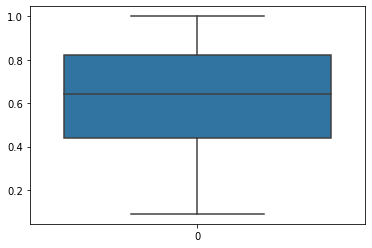

In [ ]:
sns.boxplot(data=data['satisfaction_level'])


<Axes: >

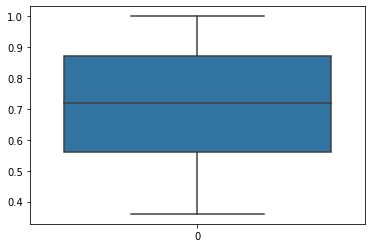

In [ ]:
sns.boxplot(data=data['last_evaluation'])

<Axes: >

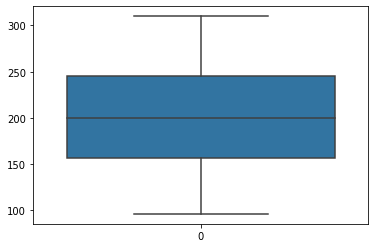

In [ ]:
sns.boxplot(data=data['average_montly_hours'])

3. **Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.** 

<Axes: >

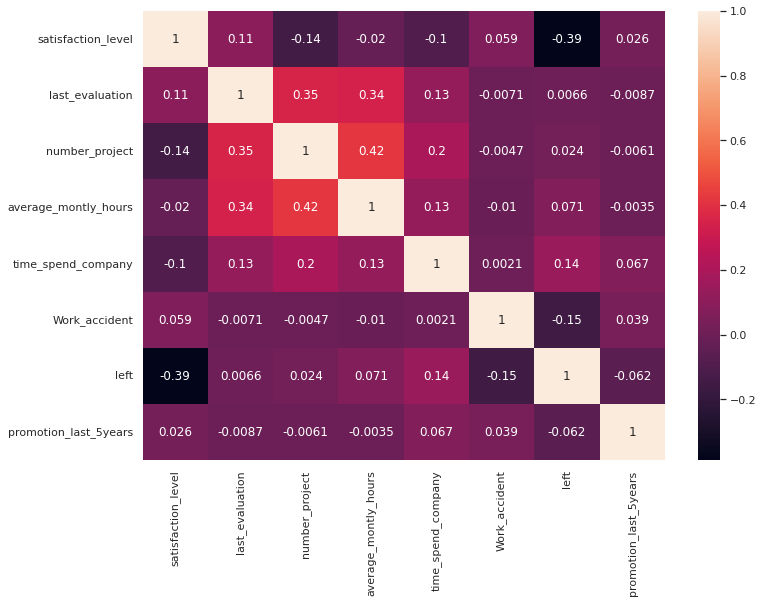

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(), annot=True)

4. **Рассчитайте сколько сотрудников работает в каждом
департаменте.**


In [ ]:
dep_dist = pd.DataFrame({'department':data['department'].value_counts().index, 'count':data['department'].value_counts().values})
dep_dist.style.bar(align='mid', color='pink')

,department,count
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


<Axes: xlabel='department'>

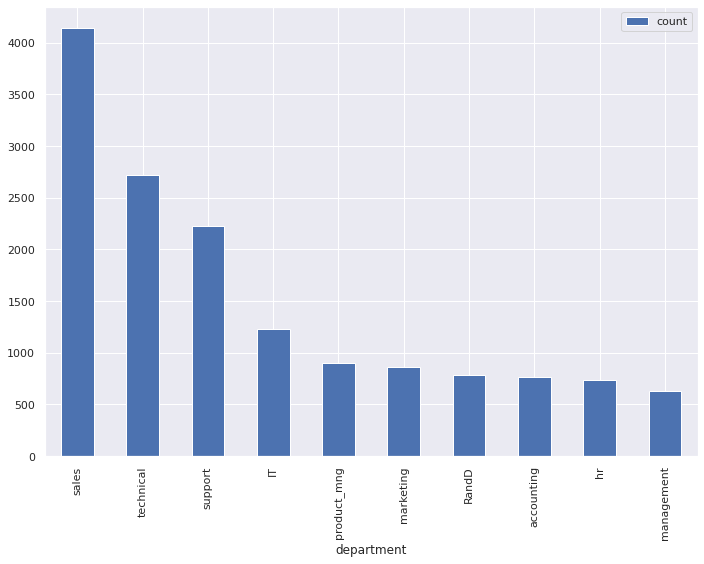

In [ ]:
dep_dist.plot('department','count',kind = 'bar')

5. Показать распределение сотрудников по зарплатам

<Axes: title={'center': 'Уровень заработной платы'}, ylabel='salary'>

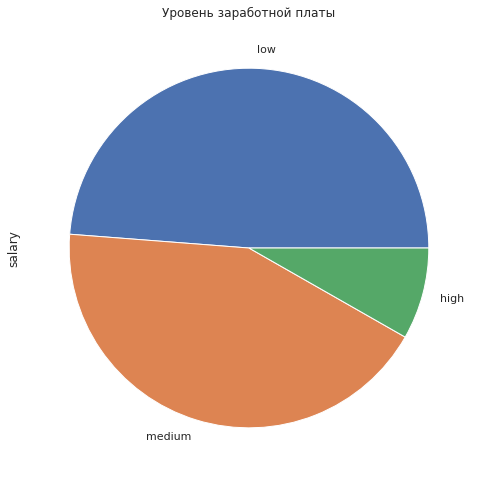

In [ ]:
# распределение сотрудников по зарплатам
sal_data = data['salary'].value_counts()
# pie_data
sal_data.plot(kind='pie', title='Уровень заработной платы')

<Axes: title={'center': 'Распределение заработной платы'}, xlabel='Уровень', ylabel='Количество сотрудников'>

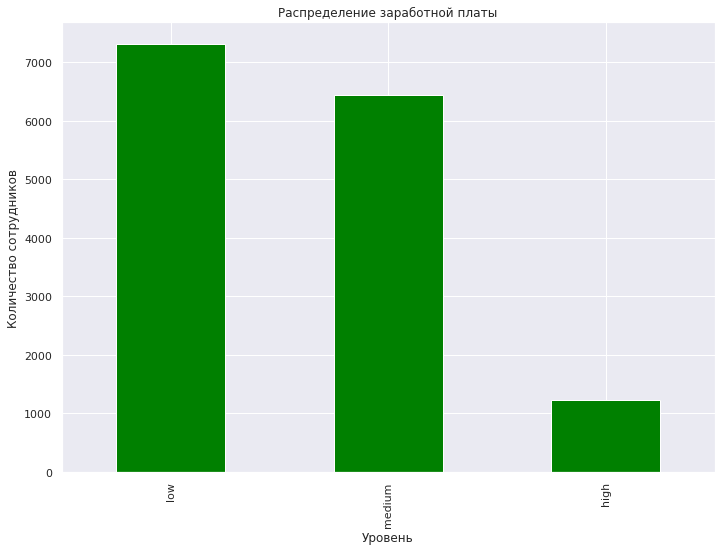

In [ ]:
sal_data.plot(kind='bar', title='Распределение заработной платы',xlabel='Уровень',ylabel='Количество сотрудников', color = 'green')

6. ****Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности**

In [ ]:
# распределение сотрудников по зарплатам
sal_data = data.groupby('department')['salary'].value_counts()

sal_data


department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

<Axes: xlabel='department'>

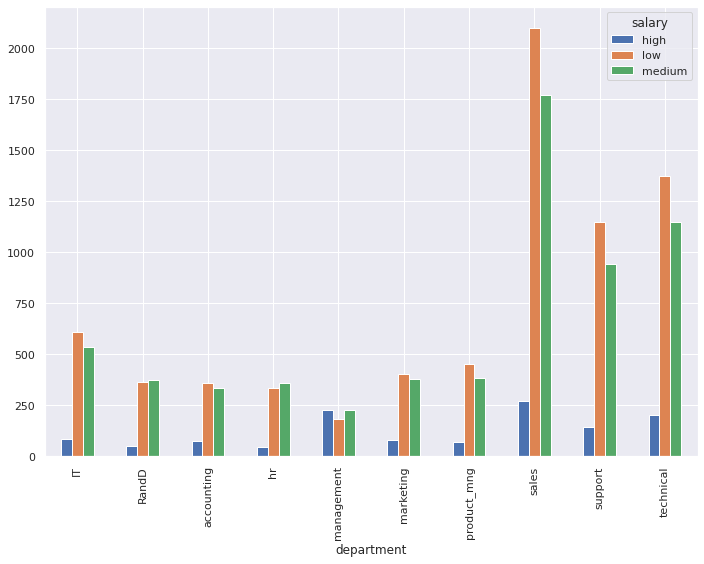

In [ ]:
sal_data.loc[sal_data.index.get_level_values('department').unique()].unstack().plot(kind='bar')

7. **Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**


In [ ]:
# разобьем данные на 2 выборки. время проведенное на работе для зп высоких и низких
A = data.loc[data['salary']=='high']
B = data.loc[data['salary']=='low']


In [ ]:
A

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high
...,...,...,...,...,...,...,...,...,...,...
14829,0.45,0.57,2,148,3,0,1,0,marketing,high
14868,0.43,0.55,2,130,3,0,1,0,support,high
14902,0.45,0.46,2,159,3,0,1,0,hr,high
14941,0.43,0.49,2,131,3,0,1,0,RandD,high


In [ ]:
B

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Итак, у нас две выборки. Нам нужно проверить гипотезу, что средние этих выборок отличаются (разное время проводят на работе в зависимости от уровня оклада). Нулевая гипотеза - не отличаются

In [ ]:
# используем тест Стьюдента
np.random.seed(54)

stat, p = st.ttest_ind(A['average_montly_hours'], B['average_montly_hours'])

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -0.72887, p = 0.4661023478
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


In [ ]:
# попробуем для контроля еще Тест Манна-Уитни
stat, p = st.mannwhitneyu(A['average_montly_hours'], B['average_montly_hours'])

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Похоже, что средние выборок не отличаются - значит отклоняем гипотезу. Однако, есть мнение, что такие выборки не оч информативны, тк. ранее мы видели , что уровень зп очень разный от департаментов. Вероятно, всех скопом не стоит сравнивать

8. **Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**

    ● Доля сотрудников с повышением за последние 5 лет

    ● Средняя степень удовлетворенности

    ● Среднее количество проектов

In [ ]:
# разобьем на два датасета - уволившиеся и нет
data_retaired = data.query('left == 1')
data_left = data.query('left != 1')

In [ ]:
# Доля сотрудников с повышением за последние пять лет среди уволившихся
prom_1 = len(data_retaired.query('promotion_last_5years == 1'))/len(data)
print(f"Доля уволившихся сотрудников с повышением за последние пять лет = {prom_1:.4f}")

Доля уволившихся сотрудников с повышением за последние пять лет = 0.0013


In [ ]:
# Доля сотрудников с повышением за последние пять лет среди оставшихся
prom_2 = len(data_left.query('promotion_last_5years == 1'))/len(data)
print(f"Доля оставшихся сотрудников с повышением за последние пять лет = {prom_2:.4f}")

Доля оставшихся сотрудников с повышением за последние пять лет = 0.0200


In [ ]:
# Средняя степень удовлетворенности среди уволившихся
sat_1 = data_retaired['satisfaction_level'].mean()
print(f"Средняя степень удовлетворенности среди уволившихся = {sat_1:.3f}")

# Средняя степень удовлетворенности среди оставшихся
sat_2 = data_left['satisfaction_level'].mean()
print(f"Средняя степень удовлетворенности среди оставшихся = {sat_2:.3f}")

Средняя степень удовлетворенности среди уволившихся = 0.440
Средняя степень удовлетворенности среди оставшихся = 0.667


степень удовлетворенности выше у тех, кто остался работать в компании, что весьма логично

In [ ]:
# Среднее количество проектов среди уволившихся
proj_1 = data_retaired['number_project'].mean()
print(f"Среднее кол-во проектов среди уволившихся = {proj_1:.2f}")

# Среднее количество проектов среди оставшихся
proj_2 = data_left['number_project'].mean()
print(f"Среднее кол-во проектов среди оставшихся = {proj_2:.2f}")

Среднее кол-во проектов среди уволившихся = 3.86
Среднее кол-во проектов среди оставшихся = 3.79


9. **Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборке**

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['department', 'salary'], axis=1), data['left'], random_state=42)

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis() #создаем объект

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test.to_numpy(), lda.predict(X_test)]).T
result.columns = ['test', 'predict']
len(result.query('test != predict'))/len(result.query('test == predict')) # доля неверных предсказаний. Модель не очень хорошо предсказывает. Пробовалапоочередно убирать параметры из учета. Но самый низкий процент неправильных предсказаний 31 процент. Судя по всему, это метод не оч подходит здесь

0.32696390658174096